# Rainfall Prediction - Weather Forecasting

# Problem Statement:
Rain Prediction –Weather forecasting
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.

# Here, predict two things:
Problem Statement:
1) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

2) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

# Import Basic Libraries

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly_express==0.4.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
#load the dataset
df=pd.read_csv('rainfall.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
pd.set_option('display.max_columns',None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
# shape of the dataset
df.shape

(8425, 23)

In [7]:
# All variable names
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
#check the datatype of all variables
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
#check Empty spaces in dataset
for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []
Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []
Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []
Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, 

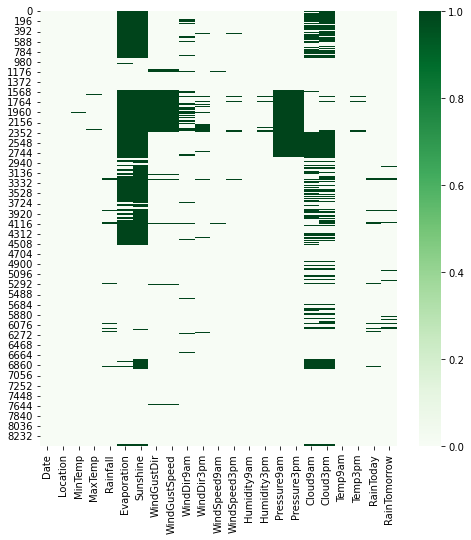

In [10]:
#check the null values using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),cmap='Greens');

In [11]:
#count the null values in each variable
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

# Handle Null values

In [12]:
from sklearn.impute import SimpleImputer  

In [13]:
int_impute=SimpleImputer(strategy='mean')
object_impute=SimpleImputer(strategy='most_frequent')

In [14]:
list_int=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am',
          'WindSpeed3pm','Humidity9am', 'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am', 
          'Cloud3pm','Temp9am','Temp3pm',]
list_object=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [15]:
for x in list_int:
    df[x]=int_impute.fit_transform(df[x].values.reshape(-1,1))
for x in list_object:
    df[x]=object_impute.fit_transform(df[x].values.reshape(-1,1))

In [16]:
#check the null values after applying SimpleImputer
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [17]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

# Observations:-
1) RangeIndex: 8425 entries, 0 to 8424
2) Data columns (total 23 columns)
3) There is no null values in dataset
4) dtypes: float64(16), object(7)
5) memory usage: 1.5+ MB

In [18]:
#counting uniques of all variables
df.nunique()

Date             3004
Location           12
MinTemp           286
MaxTemp           332
Rainfall          251
Evaporation       117
Sunshine          141
WindGustDir        16
WindGustSpeed      53
WindDir9am         16
WindDir3pm         16
WindSpeed9am       35
WindSpeed3pm       36
Humidity9am        91
Humidity3pm        95
Pressure9am       385
Pressure3pm       375
Cloud9am           10
Cloud3pm           10
Temp9am           305
Temp3pm           329
RainToday           2
RainTomorrow        2
dtype: int64

# More Details about Dataset

In [19]:
#check the unique of variable
print(df['Location'].unique())
#count the unique values
print(df['Location'].value_counts())

['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


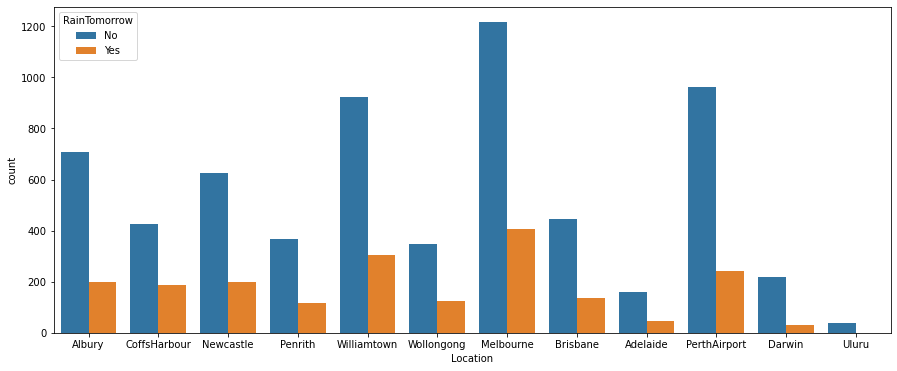

In [20]:
#count plot
plt.figure(figsize=(15,6))
sns.countplot(df['Location'],hue=df['RainTomorrow']);

In [21]:
#check the unique of variable
print(df['WindGustDir'].unique())
#count the unique values
print(df['WindGustDir'].value_counts())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


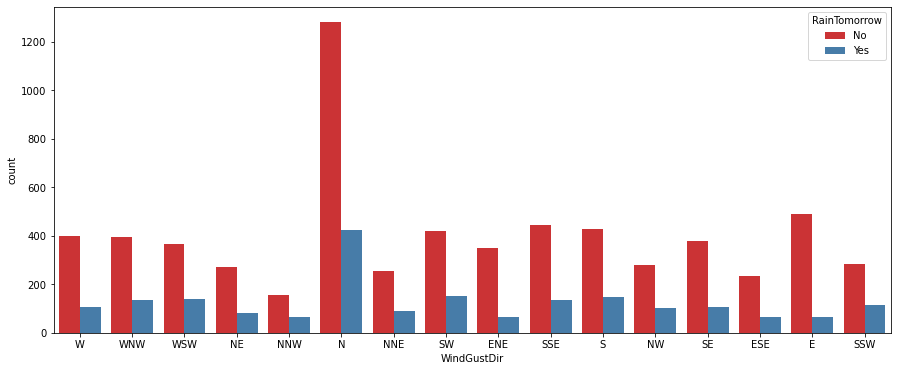

In [22]:
#count plot
plt.figure(figsize=(15,6))
sns.countplot(df['WindGustDir'],hue=df['RainTomorrow'],palette='Set1');

In [23]:
#check the unique of variable
print(df['WindDir9am'].unique())
#count the unique values
print(df['WindDir9am'].value_counts())

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


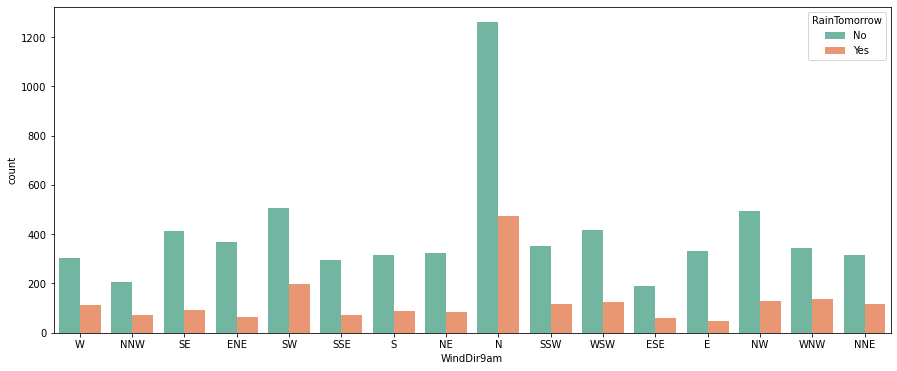

In [24]:
#count plot
plt.figure(figsize=(15,6))
sns.countplot(df['WindDir9am'],hue=df['RainTomorrow'],palette='Set2');

In [25]:
#check the unique of variable
print(df['WindDir3pm'].unique())
#count the unique values
print(df['WindDir3pm'].value_counts())

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


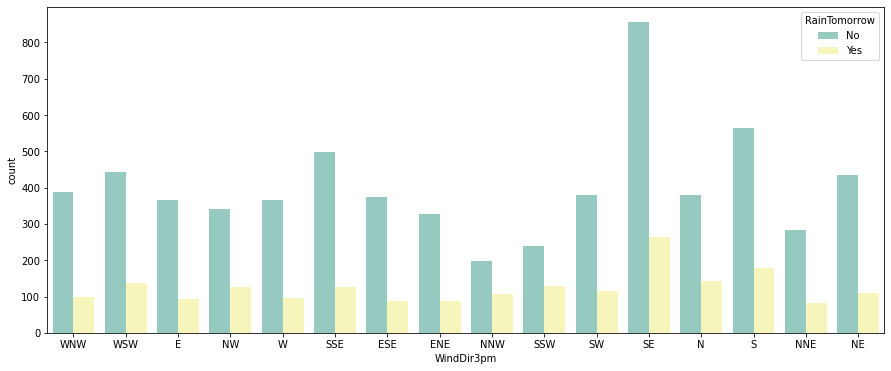

In [26]:
#count plot
plt.figure(figsize=(15,6))
sns.countplot(df['WindDir3pm'],hue=df['RainTomorrow'],palette='Set3');

In [27]:
#check the unique of variable
print(df['RainToday'].unique())
#count the unique values
print(df['RainToday'].value_counts())

['No' 'Yes']
No     6435
Yes    1990
Name: RainToday, dtype: int64


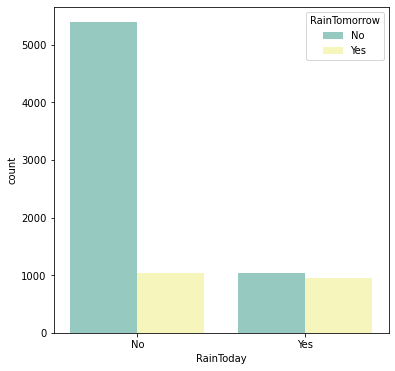

In [28]:
#count plot
plt.figure(figsize=(6,6))
sns.countplot(df['RainToday'],hue=df['RainTomorrow'],palette='Set3');

# If Today have Rain means there is chance of Rain Tomorrow

In [29]:
#check the unique of variable
print(df['RainTomorrow'].unique())
#count the unique values
print(df['RainTomorrow'].value_counts())

['No' 'Yes']
No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


In [30]:
df['RainTomorrow']=df['RainTomorrow'].replace('Yes',1)
df['RainTomorrow']=df['RainTomorrow'].replace('No',0)

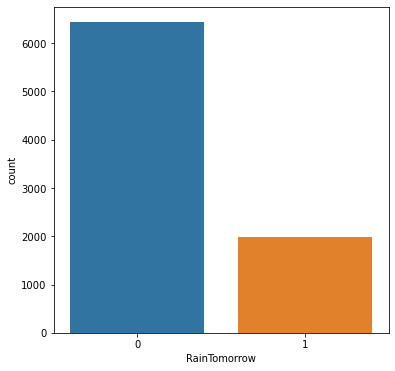

In [31]:
#count plot
plt.figure(figsize=(6,6))
sns.countplot(df['RainTomorrow']);

In [32]:
#describe dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8425.0,13.193305,5.379488,-2.0,9.300000,13.200000,17.300000,28.5
MaxTemp,8425.0,23.859976,6.114516,8.2,19.300000,23.300000,28.000000,45.5
Rainfall,8425.0,2.805913,10.309308,0.0,0.000000,0.000000,1.400000,371.0
Evaporation,8425.0,5.389395,3.852004,0.0,4.000000,5.389395,5.389395,145.0
Sunshine,8425.0,7.632205,2.825451,0.0,7.632205,7.632205,8.900000,13.9
WindGustSpeed,8425.0,40.174469,13.776101,7.0,31.000000,40.174469,48.000000,107.0
WindSpeed9am,8425.0,13.847646,10.128579,0.0,6.000000,13.000000,20.000000,63.0
WindSpeed3pm,8425.0,18.533662,9.704759,0.0,11.000000,19.000000,24.000000,83.0
Humidity9am,8425.0,67.822496,16.774231,10.0,56.000000,68.000000,80.000000,100.0
Humidity3pm,8425.0,51.249790,18.311894,6.0,39.000000,51.000000,63.000000,99.0


# Apply Label Encoder

In [33]:
df1=df.copy()#copy the dataset
x=df1.drop('RainTomorrow',axis=1)#independent variables
y=df1['RainTomorrow']#Target variable

In [34]:
from sklearn.preprocessing import LabelEncoder
x=x.apply(LabelEncoder().fit_transform)#applying LabelEncoder

In [35]:
df1=x #make dataframe and add target variable
df1['RainTomorrow']=y

In [36]:
df1.head()#display dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,150,134,5,28,77,13,21,13,14,12,14,61,16,90,103,9,5,145,134,0,0
1,1,1,89,157,0,28,77,14,21,6,15,2,13,33,19,119,110,5,5,148,160,0,0
2,2,1,144,163,0,28,77,15,22,13,15,11,15,27,24,89,119,5,2,187,149,0,0
3,3,1,107,186,0,28,77,4,9,9,0,6,5,34,10,189,160,5,5,158,182,0,0
4,4,1,191,229,8,28,77,13,19,1,7,4,12,72,27,121,92,8,9,155,214,0,0


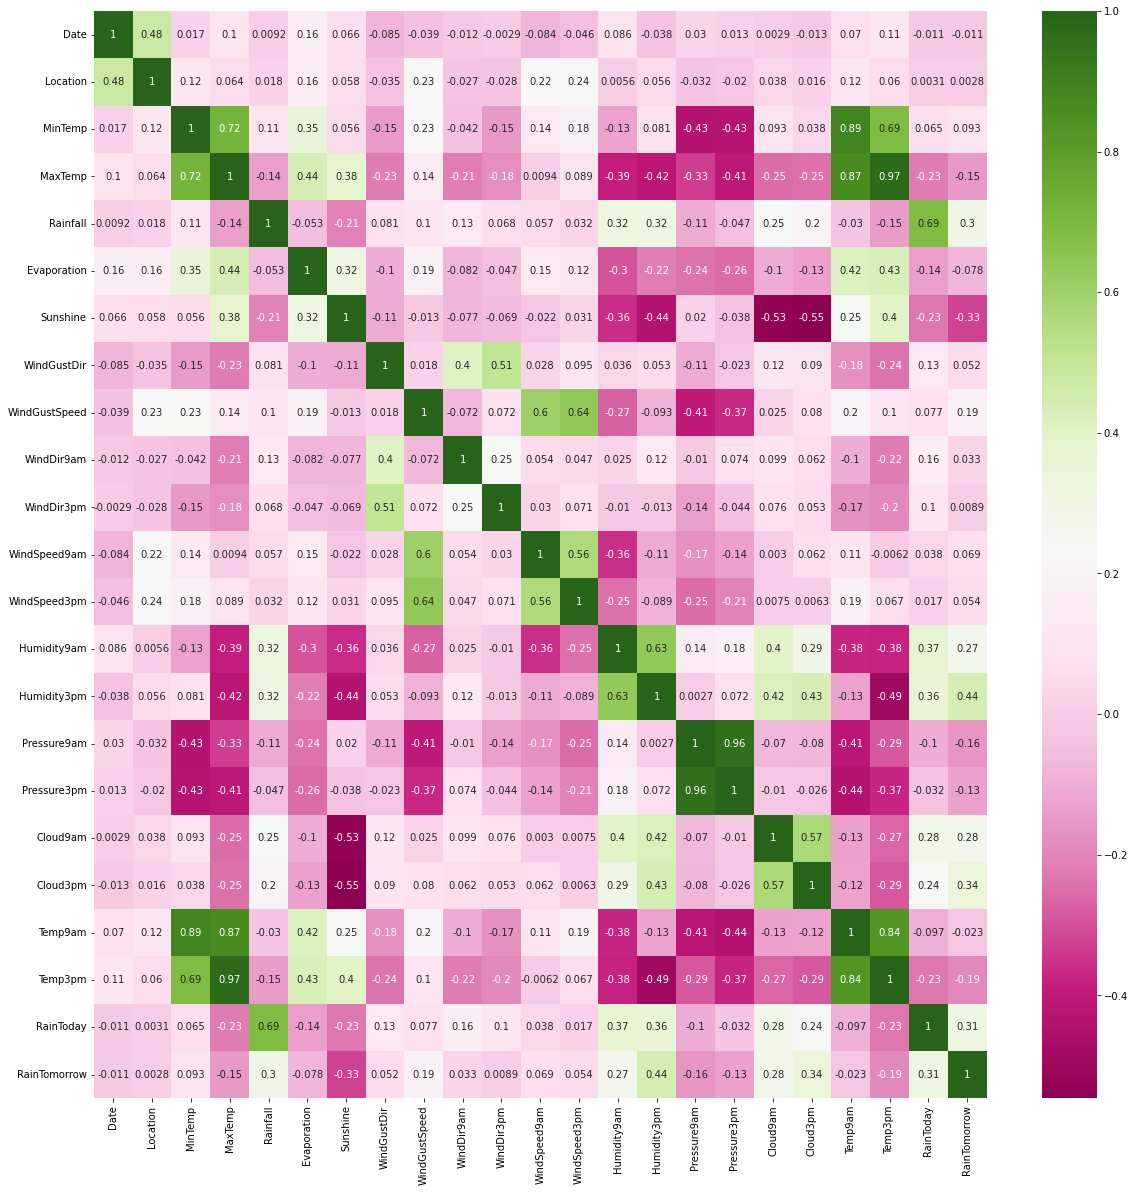

In [37]:
#checking correlation using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,cmap='PiYG');#plot heatmap

In [38]:
#check correlation with each other
df1.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.475037,0.016757,0.102200,0.009158,0.161837,0.065733,-0.084552,-0.039276,-0.012369,-0.002895,-0.083774,-0.046043,0.086080,-0.038106,0.029876,0.013289,0.002934,-0.013024,0.070465,0.113730,-0.011365,-0.011228
Location,0.475037,1.000000,0.116680,0.063546,0.018164,0.160332,0.057771,-0.035408,0.231501,-0.027103,-0.027736,0.223398,0.235268,0.005638,0.055915,-0.032385,-0.020237,0.037542,0.016119,0.117723,0.060170,0.003071,0.002824
MinTemp,0.016757,0.116680,1.000000,0.718592,0.105315,0.350090,0.056010,-0.145701,0.230027,-0.041941,-0.147805,0.135848,0.180769,-0.129359,0.080576,-0.432260,-0.426269,0.093438,0.038074,0.887402,0.686593,0.064838,0.092922
MaxTemp,0.102200,0.063546,0.718592,1.000000,-0.139788,0.437565,0.379037,-0.225477,0.138626,-0.214861,-0.181857,0.009424,0.089045,-0.389065,-0.419233,-0.329444,-0.407924,-0.251424,-0.248098,0.866834,0.974567,-0.225181,-0.152943
Rainfall,0.009158,0.018164,0.105315,-0.139788,1.000000,-0.053460,-0.210424,0.081221,0.102154,0.131358,0.067595,0.057465,0.032475,0.318877,0.315005,-0.106416,-0.046501,0.250101,0.203319,-0.030015,-0.147067,0.686172,0.295745
Evaporation,0.161837,0.160332,0.350090,0.437565,-0.053460,1.000000,0.316196,-0.103835,0.188847,-0.082053,-0.046839,0.146507,0.123810,-0.296954,-0.219242,-0.243377,-0.255824,-0.100585,-0.133361,0.416408,0.426255,-0.140285,-0.078041
Sunshine,0.065733,0.057771,0.056010,0.379037,-0.210424,0.316196,1.000000,-0.106173,-0.013310,-0.076650,-0.068775,-0.021564,0.030868,-0.361136,-0.440455,0.020112,-0.038393,-0.533121,-0.546233,0.250462,0.396063,-0.234619,-0.327982
WindGustDir,-0.084552,-0.035408,-0.145701,-0.225477,0.081221,-0.103835,-0.106173,1.000000,0.018140,0.403562,0.505799,0.027915,0.094911,0.035730,0.052549,-0.108534,-0.023267,0.120274,0.089615,-0.177180,-0.239685,0.125188,0.051832
WindGustSpeed,-0.039276,0.231501,0.230027,0.138626,0.102154,0.188847,-0.013310,0.018140,1.000000,-0.071561,0.071703,0.602591,0.640484,-0.269905,-0.092702,-0.405308,-0.369593,0.025188,0.079771,0.200850,0.101090,0.076915,0.190116
WindDir9am,-0.012369,-0.027103,-0.041941,-0.214861,0.131358,-0.082053,-0.076650,0.403562,-0.071561,1.000000,0.249527,0.054401,0.047275,0.024917,0.124468,-0.010415,0.073987,0.098617,0.062000,-0.103552,-0.222360,0.157324,0.032860


# Observations:-
1) Date variable is Positive correlation with Location variable.
2) Maximum Temperture variable is high positive correlation with Minimum Temperture variable
3) Temp9am and Temp3pm high Positive correlation with Minimum and Maximum Temperture Variables
4) Rain day is High Positive correlation with Rainfall variable
5) Cloud9am and Cloud3pm High Negative correlation with Sunshine variable
6) WindSpeed9am and WindSpeed3pm variables are High Positive correlation with WindGustSpeed variable
7) Pressure9am and Pressure3pm High Negative correlation with Minimum Temperture
8) Pressure9am and Pressure3pm High Negative correlation with WindGustSpeed variable
9) Humidity9am is High Positive correlation with the Humidity3pm variable
10) Pressure9am and Pressure3pm High Positive Correlation with Each other
11) Cloud9am and Cloud9am variables are High Positive correlations with Each other
12) Temp9am and Temp9am are High Positive Correlation with Each Other
13) WindSpeed9am and WindSpeed3pm variables are High Positive Correlation with each other
14) Cloud9am and Cloud9am variables are High Positive correlations with Humidity9am and Humidity3pm
15) Temp9am and Temp9am are High Negative Correlation with Humidity9am and Humidity3pm Also Pressure9am and Pressure3pm

# Target Variable Correlation

In [39]:
df_target=df1.corr()#correlation of dataset
df_target['RainTomorrow'].sort_values(ascending=False)#target variable correlation with other variables

RainTomorrow     1.000000
Humidity3pm      0.444154
Cloud3pm         0.341869
RainToday        0.312929
Rainfall         0.295745
Cloud9am         0.277451
Humidity9am      0.271543
WindGustSpeed    0.190116
MinTemp          0.092922
WindSpeed9am     0.069317
WindSpeed3pm     0.054107
WindGustDir      0.051832
WindDir9am       0.032860
WindDir3pm       0.008918
Location         0.002824
Date            -0.011228
Temp9am         -0.023154
Evaporation     -0.078041
Pressure3pm     -0.133168
MaxTemp         -0.152943
Pressure9am     -0.162720
Temp3pm         -0.193915
Sunshine        -0.327982
Name: RainTomorrow, dtype: float64

# Observations.
1) Humidity3pm,Cloud3pm,RainToday,Rainfall and Cloud9am variables are positive correlation with Target variable

2) Pressure3pm,MaxTemp,Pressure9am,Temp3pm and Sunshine variables are Negative correlation with Target Variable

# Scatter Plot.

In [40]:
sns.set_theme() #set the Theme

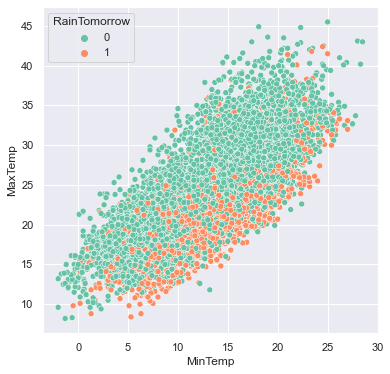

In [41]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MinTemp','MaxTemp',hue='RainTomorrow',data=df,palette='Set2');

# If you observe Minimum Temperture , It will increase when maximum temperture increase

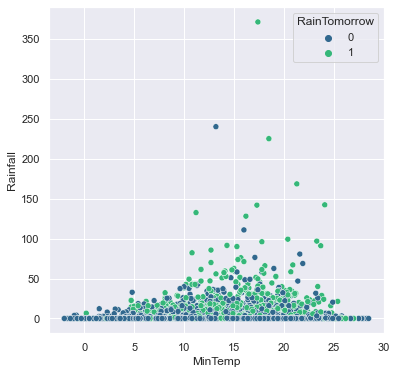

In [42]:
# make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MinTemp','Rainfall',hue='RainTomorrow',data=df,palette='viridis');

# If the minimum temperture b/w 5 to 25 there is a chance of high Rainfall

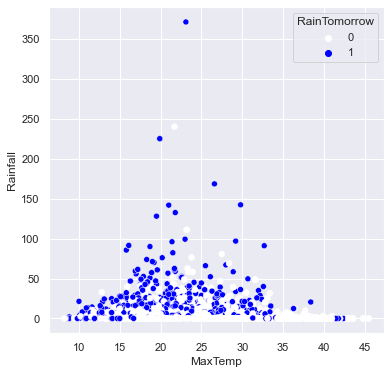

In [43]:
# make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MaxTemp','Rainfall',hue='RainTomorrow',data=df,palette='flag');

# If you observe Maximum temperture , when temperture b/w 35 to 45 there is no chance of high Rainfall

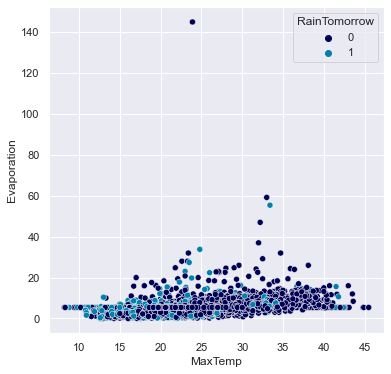

In [44]:
# make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MaxTemp','Evaporation',hue='RainTomorrow',data=df,palette='ocean');

# If you observe Evaporation , when Evaporation increase when Maximum Tempertrue increase . There is a little bit Evaporation high in high temperture

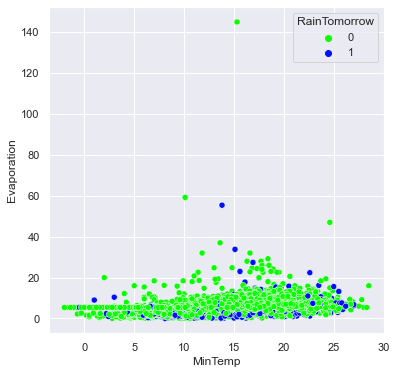

In [45]:
# make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MinTemp','Evaporation',hue='RainTomorrow',data=df,palette='hsv');

# If you observe here very fine amount of Evaporation increase when minimum temperture increase



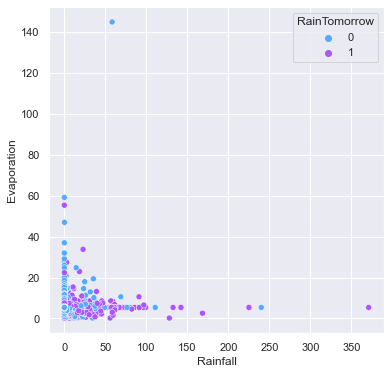

In [46]:
# make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('Rainfall','Evaporation',hue='RainTomorrow',data=df,palette='cool');

# If you observe Evaporation here , 0 Rainfall have high Evaporation. if Rainfall increase there is Evaporation is constant b/w 0 to 20.

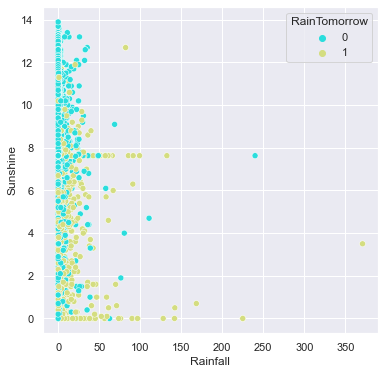

In [47]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('Rainfall','Sunshine',hue='RainTomorrow',data=df,palette='rainbow');

# If you observe here Maximum Sunshine point in 0 Rainfall. Maximum Sunshine points have in b/w 0 to 50 Rainfall

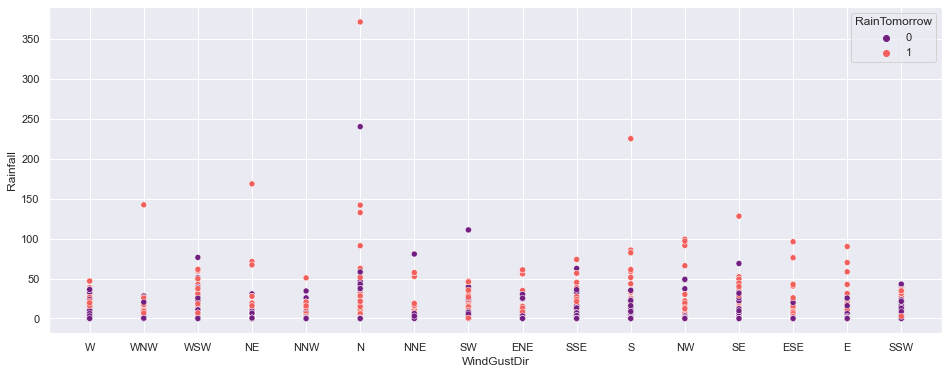

In [48]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindGustDir','Rainfall',hue='RainTomorrow',data=df,palette='magma');

# The North direction of the strongest wind gust and North direction wind gust have Maximum Rainfall and West-North-West(WNW) has low Rainfall.

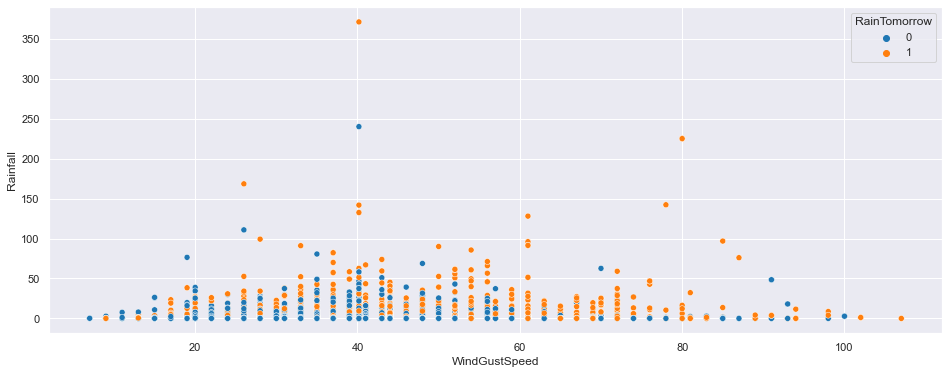

In [49]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindGustSpeed','Rainfall',hue='RainTomorrow',data=df,palette='tab10');

# The speed (km/h) of the strongest wind gust in b/w 30 to 60 have High Rainfall and as well as chance of Rain in b/w 30 to 70 wind speed.

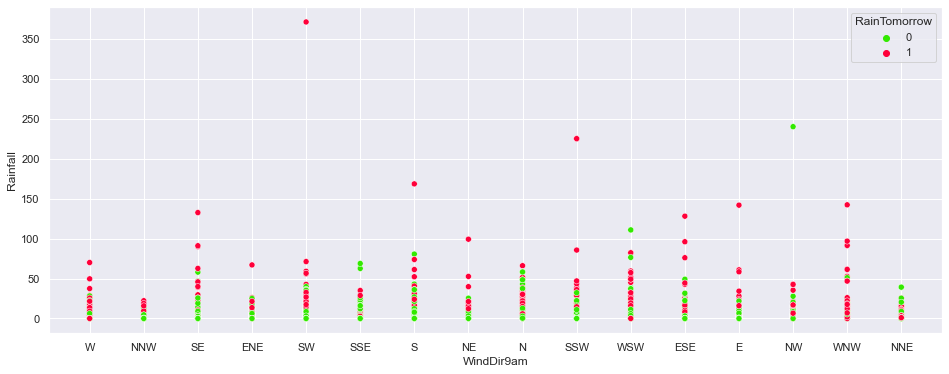

In [50]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindDir9am','Rainfall',hue='RainTomorrow',data=df,palette='prism');

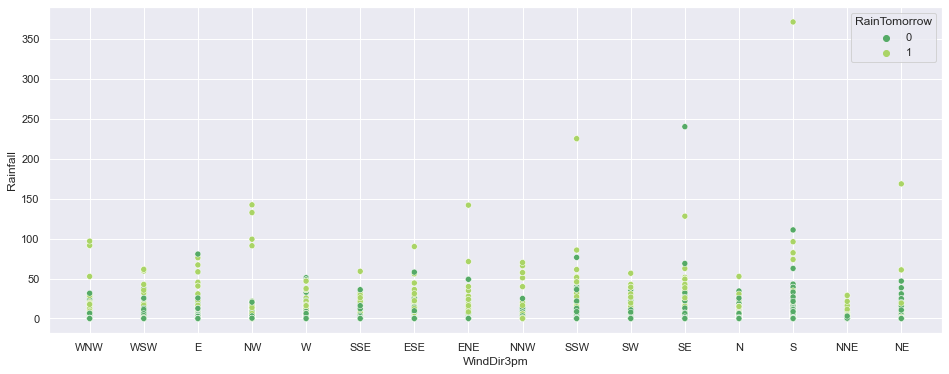

In [51]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindDir3pm','Rainfall',hue='RainTomorrow',data=df,palette='summer');

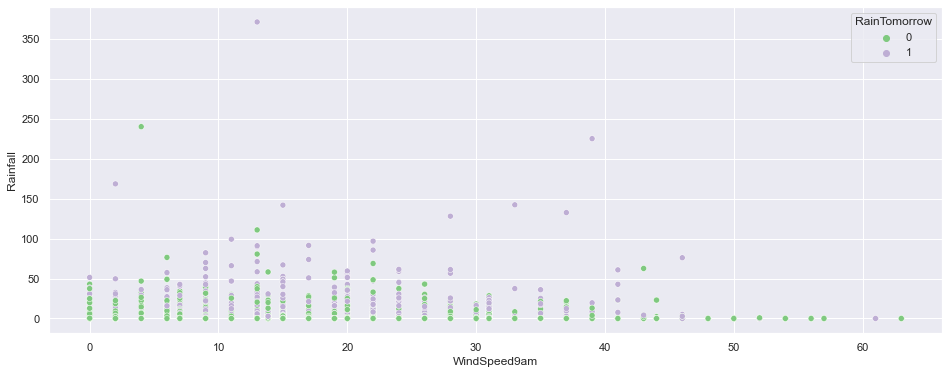

In [52]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindSpeed9am','Rainfall',hue='RainTomorrow',data=df,palette='Accent');

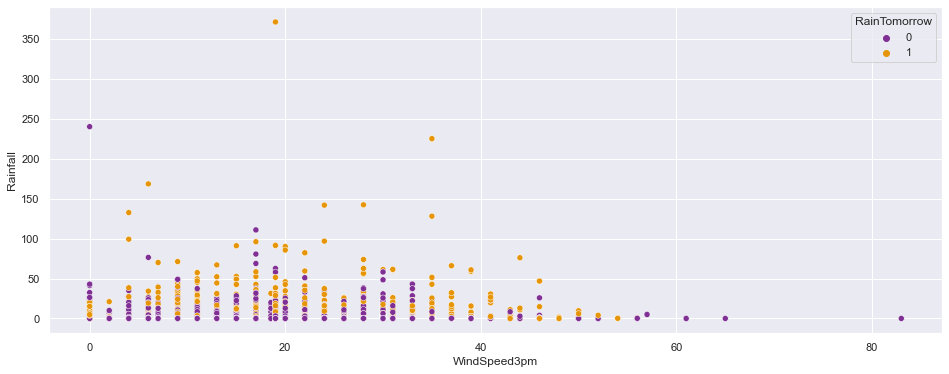

In [53]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindSpeed3pm','Rainfall',hue='RainTomorrow',data=df,palette='CMRmap');

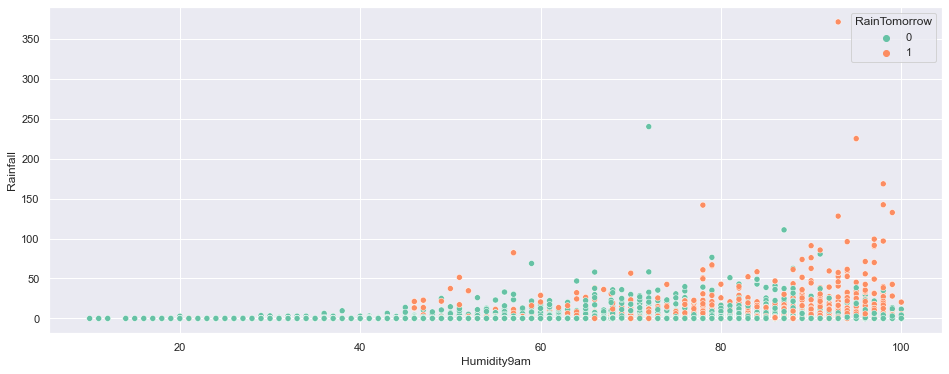

In [54]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Humidity9am','Rainfall',hue='RainTomorrow',data=df,palette='Set2');    

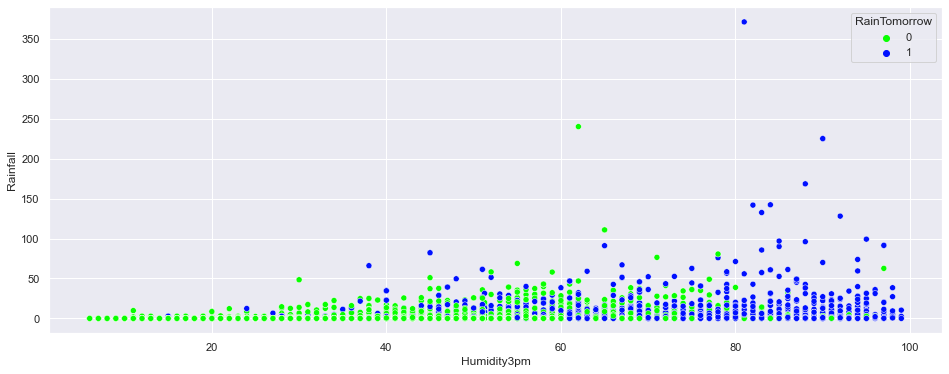

In [55]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Humidity3pm','Rainfall',hue='RainTomorrow',data=df,palette='hsv');

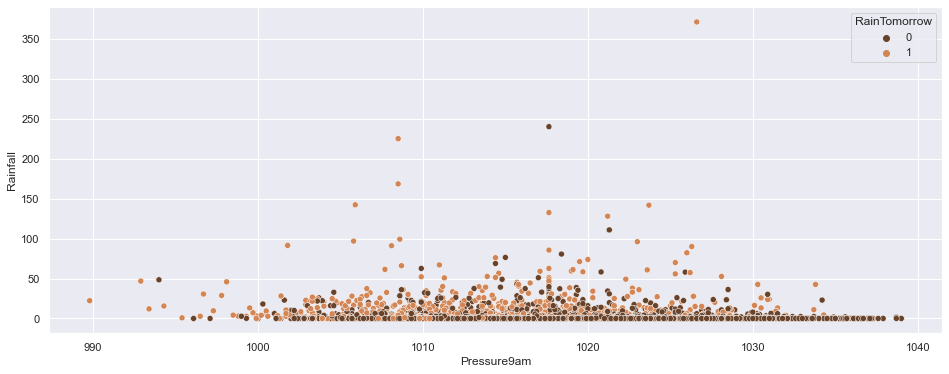

In [56]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Pressure9am','Rainfall',hue='RainTomorrow',data=df,palette='copper');

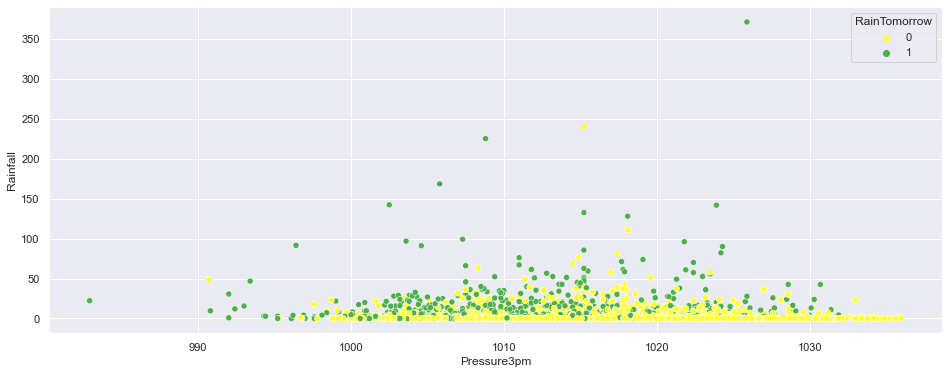

In [57]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Pressure3pm','Rainfall',hue='RainTomorrow',data=df,palette='Set1_r');

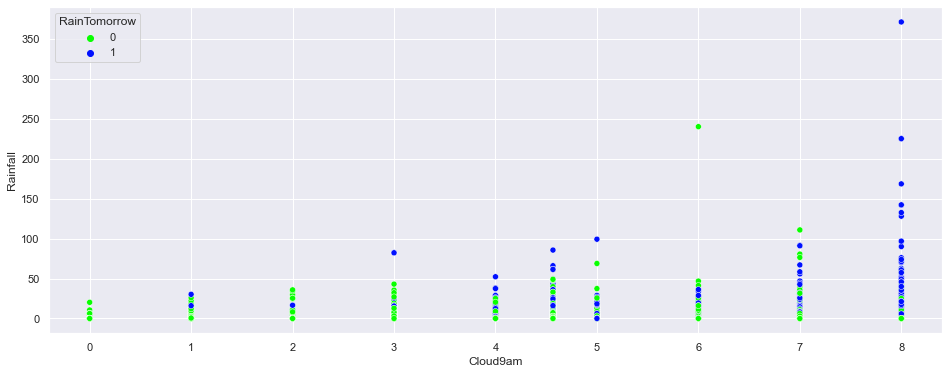

In [58]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Cloud9am','Rainfall',hue='RainTomorrow',data=df,palette='hsv');

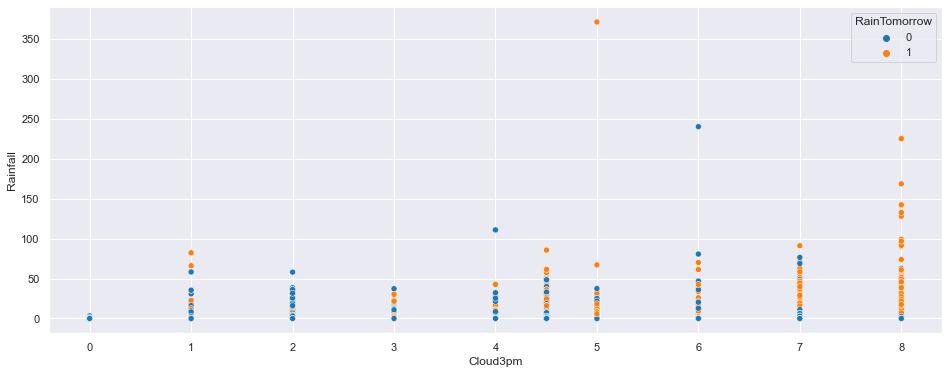

In [59]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Cloud3pm','Rainfall',hue='RainTomorrow',data=df,palette='tab10');

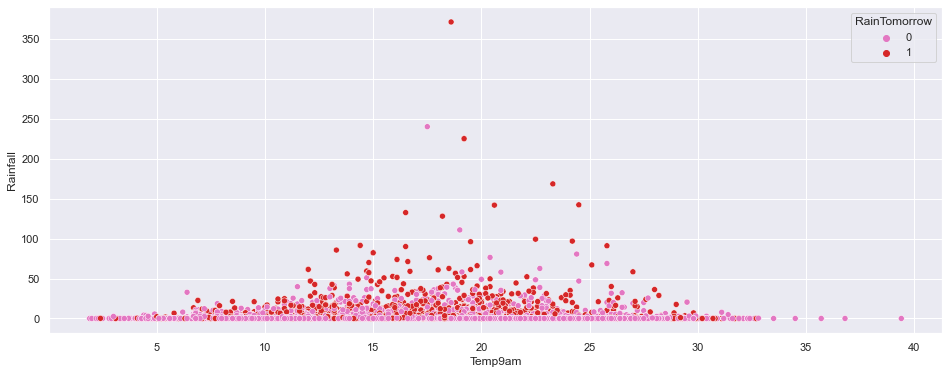

In [60]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Temp9am','Rainfall',hue='RainTomorrow',data=df,palette='tab10_r');

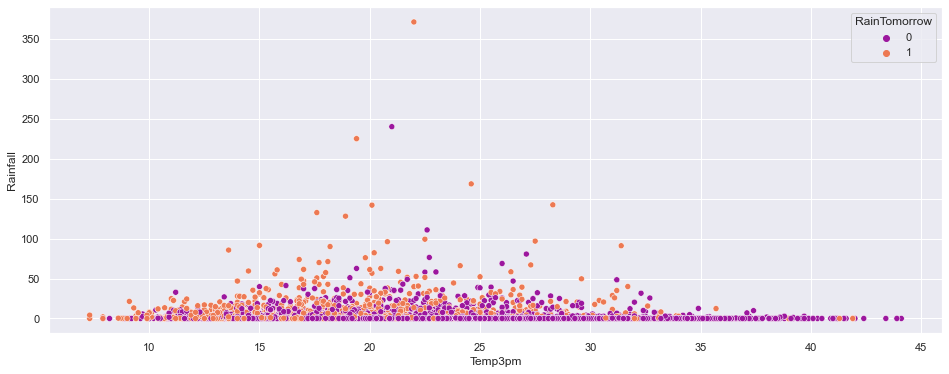

In [61]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Temp3pm','Rainfall',hue='RainTomorrow',data=df,palette='plasma');

# Pair Plot

# Apply SMOTE

In [62]:
#Apply SMOTE bcz dataset is imbalanced to make Balanced apply SMOTE
from imblearn.over_sampling import SMOTE

In [63]:
smt=SMOTE()

In [64]:
dfx=df1.drop('RainTomorrow',axis=1)
dfy=df1['RainTomorrow']

In [65]:
train_x,train_y=smt.fit_resample(dfx,dfy)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

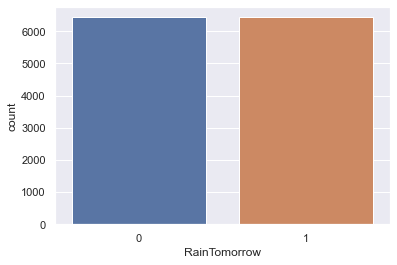

In [66]:
#count plot of target variable
sns.countplot(train_y)

In [67]:
#make dataframe
df1=train_x
#add Target variable
df1['RainTomorrow']=train_y

In [68]:
#Shape of the Dataset After applying SMOTE 
df1.shape

(12868, 23)

# Check the outliers

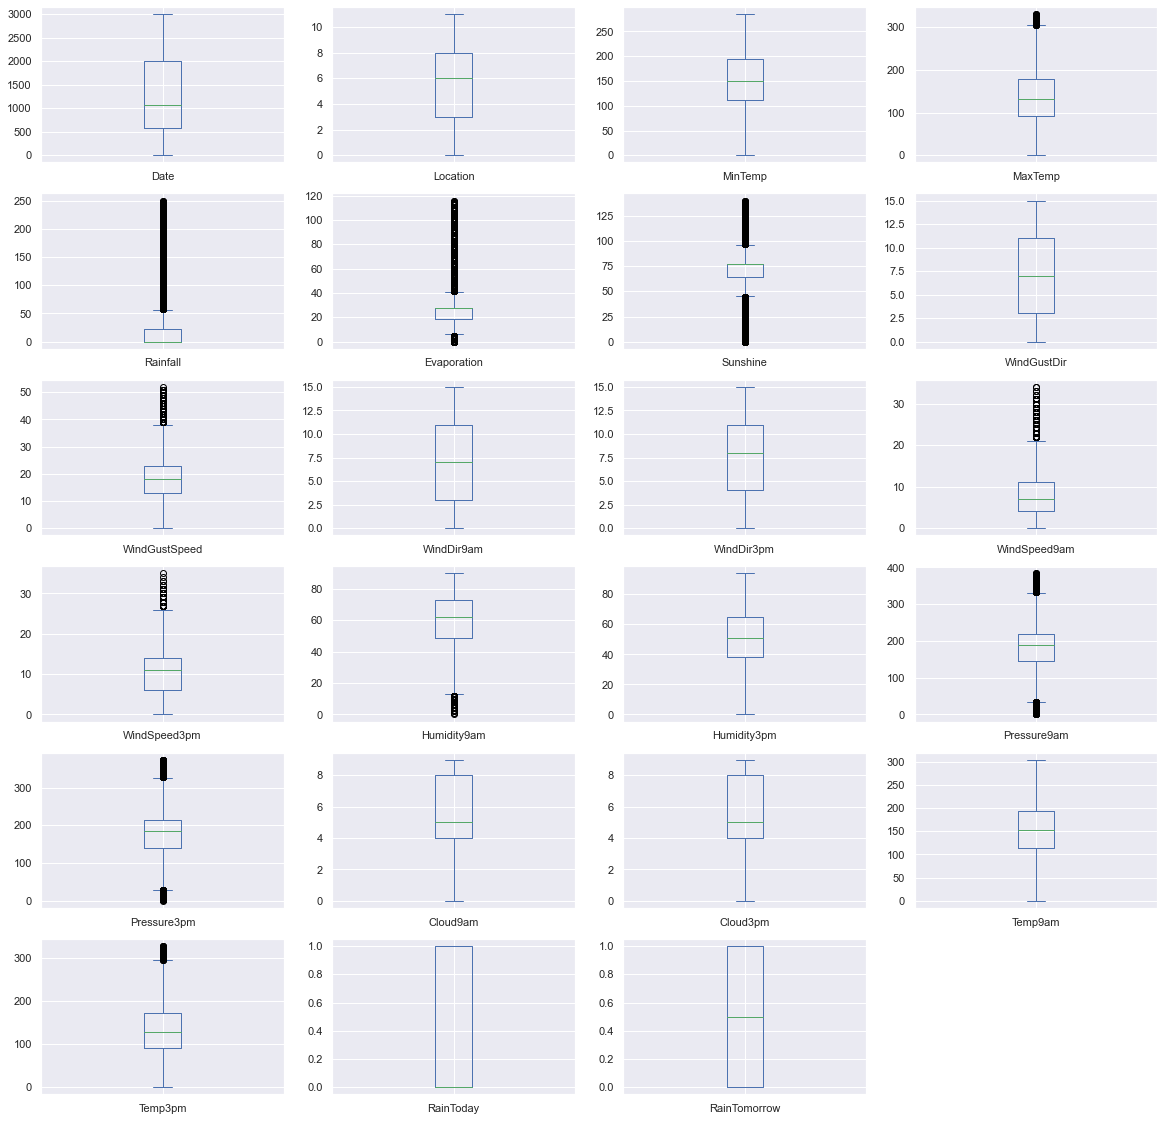

In [69]:
#check the outliers using boxplot
df1.plot(kind='box',subplots=True,layout=(6,4),figsize=(20,20));

In [70]:
#removing outliers
from scipy.stats import zscore

In [71]:
z=np.abs(zscore(df1))

In [72]:
threshold=3
print(np.where(z>3))

(array([   44,    44,    52, ..., 12824, 12849, 12865], dtype=int64), array([ 3, 20,  8, ...,  4,  4,  4], dtype=int64))


In [73]:
#removing outliers
df1=df1[(z<3).all(axis=1)]

In [74]:
#shape of the dataset after removing outliers
df1.shape

(11942, 23)

# Checking Skewness

In [75]:
x=df1.drop('RainTomorrow',axis=1)#independent variables
y=df1['RainTomorrow']#target variable

In [76]:
#checking shape of independent variables
x.shape

(11942, 22)

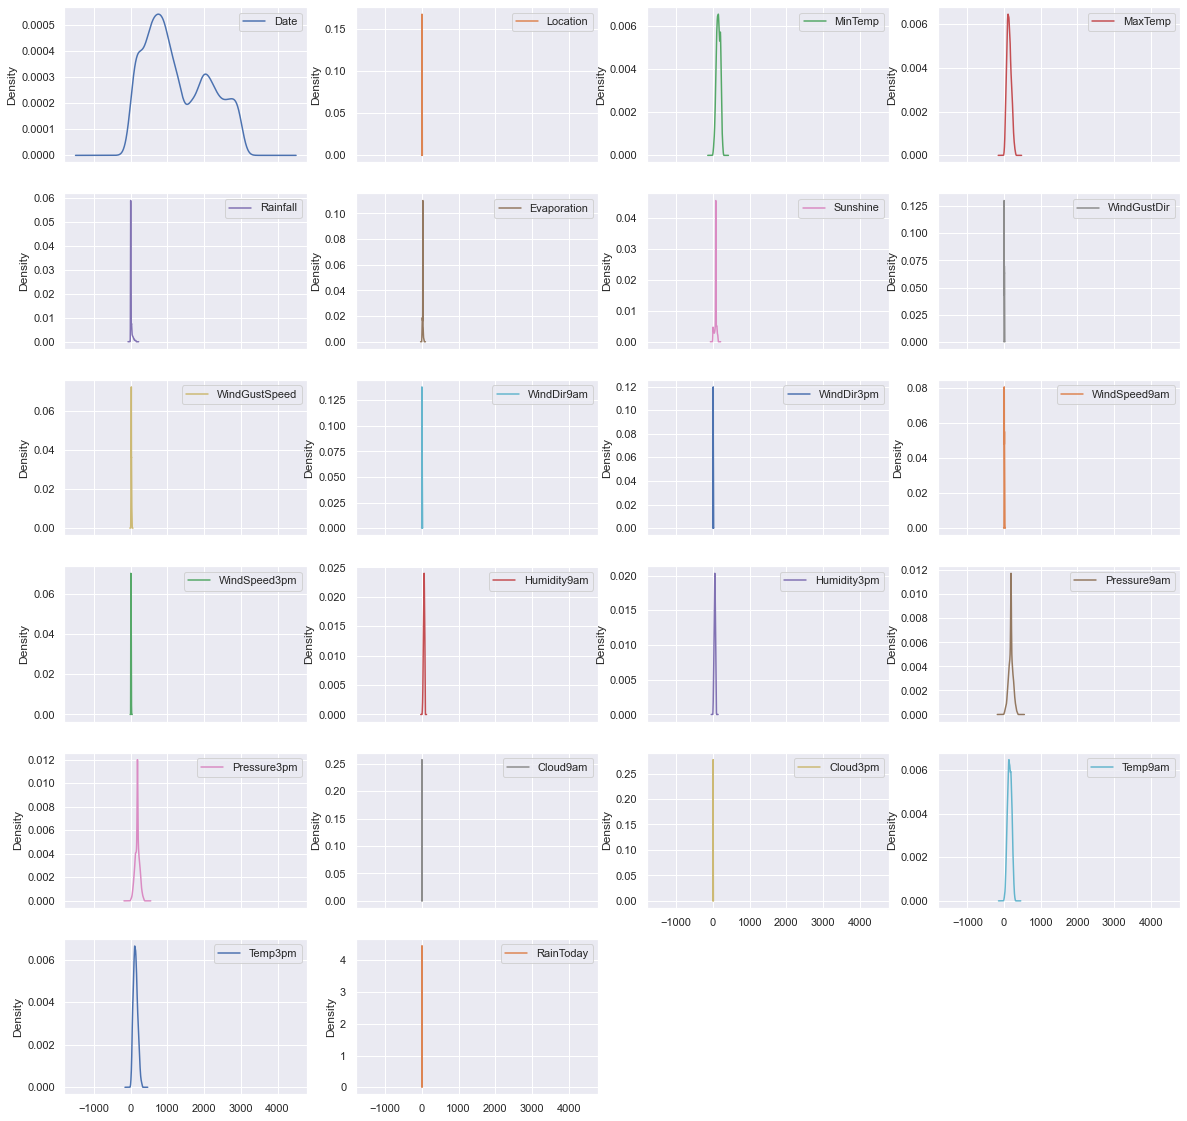

In [77]:
x.plot(kind='density',subplots=True,layout=(6,4),figsize=(20,20));

In [78]:
#checking skewness
x.skew().sort_values(ascending=False)

Rainfall         2.368163
RainToday        1.120922
WindSpeed9am     0.583882
WindGustSpeed    0.460486
Date             0.423792
Temp3pm          0.342664
Evaporation      0.331120
MaxTemp          0.324408
WindSpeed3pm     0.258125
WindDir9am       0.190795
WindGustDir      0.115013
Location         0.015396
Pressure3pm      0.003237
Temp9am         -0.009034
Pressure9am     -0.020373
MinTemp         -0.071763
Humidity3pm     -0.079786
WindDir3pm      -0.108032
Humidity9am     -0.366862
Cloud3pm        -0.460458
Cloud9am        -0.469165
Sunshine        -0.699061
dtype: float64

In [79]:
#removing skewness
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

In [80]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer(method='box-cox')
pipe=Pipeline(steps=[('s',scaler),('p',power)])

In [81]:
data=pipe.fit_transform(x)

In [82]:
#make dataframe
x=pd.DataFrame(data,columns=x.columns)

In [83]:
#Sunshine variable is Highly Negative correlation with Target variable so drop Sunshine variable
x.drop('Sunshine',axis=1,inplace=True)

# VIF(Variance Inflation Factor)

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(0,x.shape[1])]
    return vif

In [86]:
vif()

,Variables,VIF Factor
0,Date,1.426488
1,Location,1.461221
2,MinTemp,9.302534
3,MaxTemp,26.543459
4,Rainfall,3.917080
5,Evaporation,1.376242
6,WindGustDir,1.561797
7,WindGustSpeed,2.225795
8,WindDir9am,1.360639
9,WindDir3pm,1.472307


In [87]:
#Cloud9am and Cloud3pm are Same VIF Factor
x.drop('Cloud9am',axis=1,inplace=True)
#WindSpeed3pm and WindSpeed9am as same VIF Factor
x.drop('WindSpeed9am',axis=1,inplace=True)
#WindDir9am and WindDir3pm are same VIF Factor
x.drop('WindDir3pm',axis=1,inplace=True)
#Location and Date variables as same VIF Factor
x.drop('Location',axis=1,inplace=True)
#Evaporation and WindGustDir are Same vif Factor
x.drop('Evaporation',axis=1,inplace=True)

# Standard Scaler

In [88]:
scale=MinMaxScaler()

In [89]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,roc_curve

In [90]:
lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()#make data in standard scale
x=scale.fit_transform(x)

In [91]:
model_list=[lg,gnb,dtc,knc,svc,rfc,gbc,abc]

# LogisticRegression

In [92]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Oranges',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [93]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.7961490163248222 Maximum Random Number:- 11


accuracy_score:- 0.7798241942235244
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1276
           1       0.76      0.78      0.77      1113

    accuracy                           0.78      2389
   macro avg       0.78      0.78      0.78      2389
weighted avg       0.78      0.78      0.78      2389



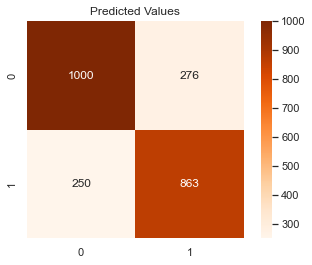

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=13)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
confusion_plot()

# GaussianNB

In [95]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Greens',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [96]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    gnb.fit(x_train,y_train)
    pred=gnb.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.752197572205944 Maximum Random Number:- 6


accuracy_score:- 0.7329426538300544
              precision    recall  f1-score   support

           0       0.78      0.71      0.75      1318
           1       0.68      0.76      0.72      1071

    accuracy                           0.73      2389
   macro avg       0.73      0.74      0.73      2389
weighted avg       0.74      0.73      0.73      2389



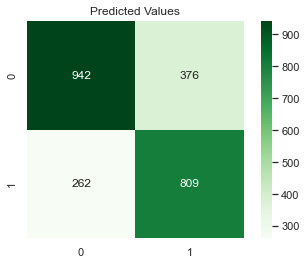

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=12)
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
confusion_plot()

# DecisionTreeClassifier

In [98]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Blues',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [99]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8714943491000419 Maximum Random Number:- 59


accuracy_score:- 0.8547509418166597
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1172
           1       0.87      0.84      0.85      1217

    accuracy                           0.85      2389
   macro avg       0.86      0.86      0.85      2389
weighted avg       0.86      0.85      0.85      2389



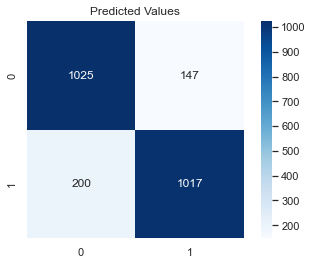

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=3)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

# KNeighborsClassifier

In [101]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Reds',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [102]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)


Accuracy score:- 0.8656341565508581 Maximum Random Number:- 38


accuracy_score:- 0.8530766010883215
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1044
           1       0.92      0.81      0.86      1345

    accuracy                           0.85      2389
   macro avg       0.85      0.86      0.85      2389
weighted avg       0.86      0.85      0.85      2389



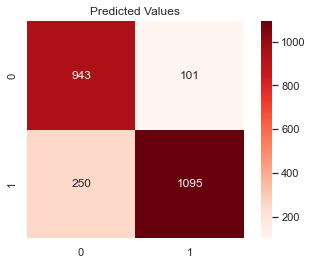

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=69)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()

# Support Vector Classifier

In [104]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='crest',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [105]:
maxacc=0
maxrn=0

for i in [1,2,11,22,33,44,55,66,77,88,99]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.833821682712432 Maximum Random Number:- 11


accuracy_score:- 0.8308915864378401
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.83      0.83      0.83      1200

    accuracy                           0.83      2389
   macro avg       0.83      0.83      0.83      2389
weighted avg       0.83      0.83      0.83      2389



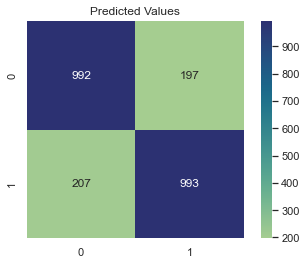

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()

# RandamForestclassifier

In [107]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='viridis',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [108]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.9313520301381331 Maximum Random Number:- 93


accuracy_score:- 0.9137714524905818
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1217
           1       0.92      0.90      0.91      1172

    accuracy                           0.91      2389
   macro avg       0.91      0.91      0.91      2389
weighted avg       0.91      0.91      0.91      2389



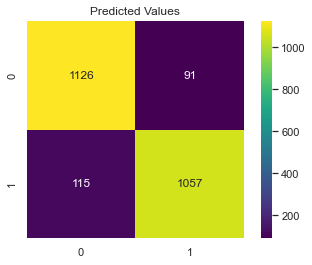

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=57)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

# GradientBoostingClassifier

In [110]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='pink',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [111]:
maxacc=0
maxrn=0

for i in [11,22,33,44,55,66,77]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8325659271661783 Maximum Random Number:- 22


accuracy_score:- 0.8246128087065718
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1174
           1       0.83      0.82      0.83      1215

    accuracy                           0.82      2389
   macro avg       0.82      0.82      0.82      2389
weighted avg       0.82      0.82      0.82      2389



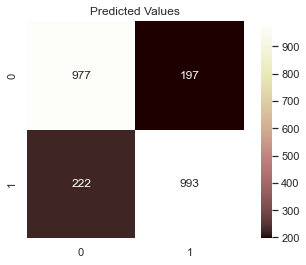

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()

# AdaBoostClassifier

In [113]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='icefire',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [114]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8078694014231896 Maximum Random Number:- 22


accuracy_score:- 0.7827542904981164
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1237
           1       0.77      0.78      0.78      1152

    accuracy                           0.78      2389
   macro avg       0.78      0.78      0.78      2389
weighted avg       0.78      0.78      0.78      2389



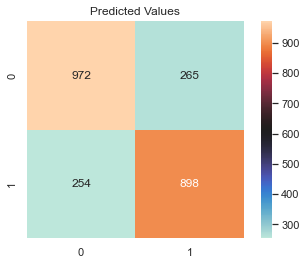

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=25)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()

# Cross Validation

In [116]:
for model in model_list:
    score=cross_val_score(model,x,y,cv=10)
    print(model)
    print(score)
    print(score.mean())

LogisticRegression()
[0.80334728 0.70460251 0.62646566 0.77051926 0.68090452 0.7001675
 0.74874372 0.81909548 0.85008375 0.83919598]
0.7543125670191964
GaussianNB()
[0.73054393 0.74225941 0.68257956 0.71356784 0.66247906 0.64740369
 0.66080402 0.76884422 0.78643216 0.79480737]
0.7189721270228409
DecisionTreeClassifier()
[0.72635983 0.74728033 0.5561139  0.8358459  0.90954774 0.94639866
 0.90703518 0.81155779 0.85427136 0.82244556]
0.8116856247766027
KNeighborsClassifier()
[0.75481172 0.74811715 0.57453936 0.78978224 0.79648241 0.83668342
 0.82160804 0.72529313 0.85008375 0.83752094]
0.7734922170125382
SVC()
[0.77991632 0.72384937 0.58375209 0.7881072  0.73869347 0.79480737
 0.78643216 0.81574539 0.88860972 0.85008375]
0.7749996846155464
RandomForestClassifier()
[0.84267782 0.83179916 0.60552764 0.87939698 0.94221106 0.98324958
 0.94053601 0.87269682 0.91959799 0.88609715]
0.8703790220278519
GradientBoostingClassifier()
[0.76820084 0.69874477 0.5159129  0.73450586 0.72110553 0.77973199


# RandomForestClassifier is best model

accuracy_score:- 0.9187944746755965
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1219
           1       0.93      0.91      0.92      1170

    accuracy                           0.92      2389
   macro avg       0.92      0.92      0.92      2389
weighted avg       0.92      0.92      0.92      2389



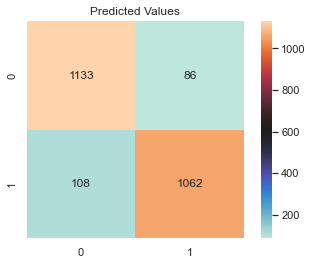

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=57)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

# Hyperparameters for a model

In [118]:
random_forest_params={'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}

In [119]:
for i in range(3,10):
    rfc_grid = GridSearchCV(rfc, random_forest_params, cv=i)
    rfc_grid.fit(x_train,y_train)
    print('Best score:', rfc_grid.best_score_)
    print('Best score:', rfc_grid.best_params_)
    print('Best score:', rfc_grid.best_estimator_)

Best score: 0.8921808479866629
Best score: {'criterion': 'entropy', 'max_features': 'auto'}
Best score: RandomForestClassifier(criterion='entropy')
Best score: 0.9042187531770756
Best score: {'criterion': 'entropy', 'max_features': 'auto'}
Best score: RandomForestClassifier(criterion='entropy')
Best score: 0.9052649718767893
Best score: {'criterion': 'gini', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(max_features='sqrt')
Best score: 0.9089294558164331
Best score: {'criterion': 'gini', 'max_features': 'auto'}
Best score: RandomForestClassifier()
Best score: 0.911964840075439
Best score: {'criterion': 'gini', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(max_features='sqrt')
Best score: 0.9118592439183364
Best score: {'criterion': 'entropy', 'max_features': 'auto'}
Best score: RandomForestClassifier(criterion='entropy')
Best score: 0.9121735861753009
Best score: {'criterion': 'entropy', 'max_features': 'auto'}
Best score: RandomForestClassifier(criterion='ent

In [120]:
rfc_grid = GridSearchCV(rfc, random_forest_params, cv=9)
rfc_grid.fit(x_train,y_train)
print('Best score:', rfc_grid.best_score_)
print('Best score:', rfc_grid.best_params_)
print('Best score:', rfc_grid.best_estimator_)

Best score: 0.9136400041100329
Best score: {'criterion': 'entropy', 'max_features': 'auto'}
Best score: RandomForestClassifier(criterion='entropy')


# ROC Curve

In [121]:
pred_prob=rfc.predict_proba(x_test)

In [122]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class=2

In [123]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

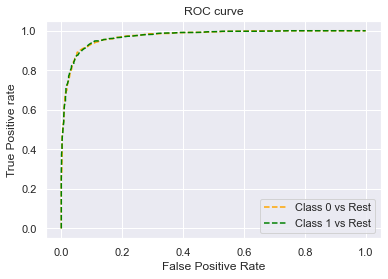

In [124]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC curve',dpi=300); 

# Save the model

In [125]:
import joblib

In [126]:
#save the model
joblib.dump(rfc,'Rainfall_Prediction_rfc.obj')

['Rainfall_Prediction_rfc.obj']

In [127]:
#load the model
loaded_model=joblib.load('Rainfall_Prediction_rfc.obj')

In [128]:
#check the model is working or not
loaded_model.predict(x_test)

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

# Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there

In [129]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0


# Apply Label Encoder

In [130]:
#independent variables
x=df.drop('Rainfall',axis=1)
#dependent variable(target variable)
y=df['Rainfall']

In [131]:
#apply label encoder of independent variables
x=x.apply(LabelEncoder().fit_transform)

In [132]:
df2=x

In [133]:
#add target variable
df2['Rainfall']=y

In [134]:
df2.head()

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall
0,0,1,150,134,28,77,13,21,13,14,12,14,61,16,90,103,9,5,145,134,0,0,0.6
1,1,1,89,157,28,77,14,21,6,15,2,13,33,19,119,110,5,5,148,160,0,0,0.0
2,2,1,144,163,28,77,15,22,13,15,11,15,27,24,89,119,5,2,187,149,0,0,0.0
3,3,1,107,186,28,77,4,9,9,0,6,5,34,10,189,160,5,5,158,182,0,0,0.0
4,4,1,191,229,28,77,13,19,1,7,4,12,72,27,121,92,8,9,155,214,0,0,1.0


# Check the Outliers

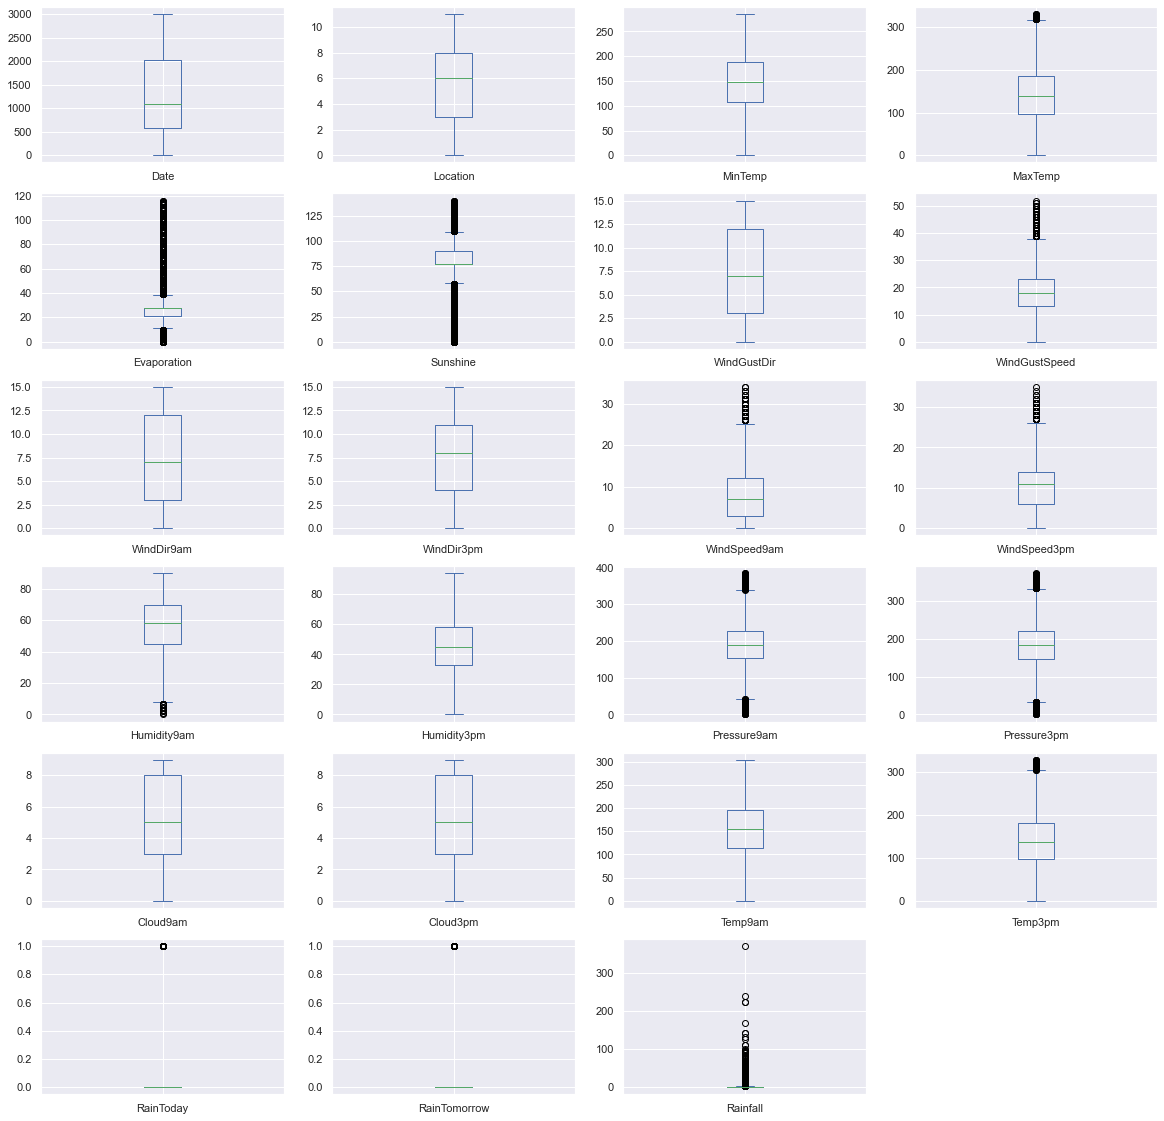

In [135]:
df2.plot(kind='box',subplots=True,layout=(6,4),figsize=(20,20));

In [136]:
#removing outliers
z=np.abs(zscore(df2))

In [137]:
threshold=3
print(np.where(z>3))

(array([  44,   52,   61,   62,   62,   67,   68,   68,  123,  267,  381,
        381,  431,  462,  563,  568,  568,  683,  699,  713,  770,  796,
        797,  802,  928,  935,  949,  979,  980,  980,  980, 1008, 1009,
       1011, 1138, 1148, 1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264,
       1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481, 1513, 1535, 1587,
       1644, 1661, 1665, 1673, 1680, 1774, 1819, 1873, 1898, 1903, 1945,
       2016, 2028, 2043, 2063, 2074, 2108, 2116, 2186, 2201, 2219, 2219,
       2230, 2231, 2265, 2429, 2488, 2500, 2505, 2527, 2527, 2541, 2593,
       2676, 2677, 2735, 2827, 2835, 2841, 2849, 2849, 2855, 2863, 2869,
       2877, 2883, 2890, 2891, 2897, 2898, 2900, 2901, 2905, 2909, 2911,
       2919, 2925, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989, 3003,
       3009, 3045, 3051, 3059, 3059, 3066, 3067, 3067, 3067, 3068, 3070,
       3082, 3082, 3082, 3089, 3089, 3099, 3099, 3101, 3141, 3143, 3150,
       3157, 3164, 3172, 3172, 3178, 3185, 3192, 3

In [139]:
#remove outliers
df_new=df2[(z<3).all(axis=1)]

In [140]:
#dataset shape after removing outliers
df_new.shape

(7992, 23)

In [141]:
df2=df_new

# Checking Skewness

In [142]:
#independent variables
x=df2.drop('Rainfall',axis=1)
#dependent variable
y=df2['Rainfall']

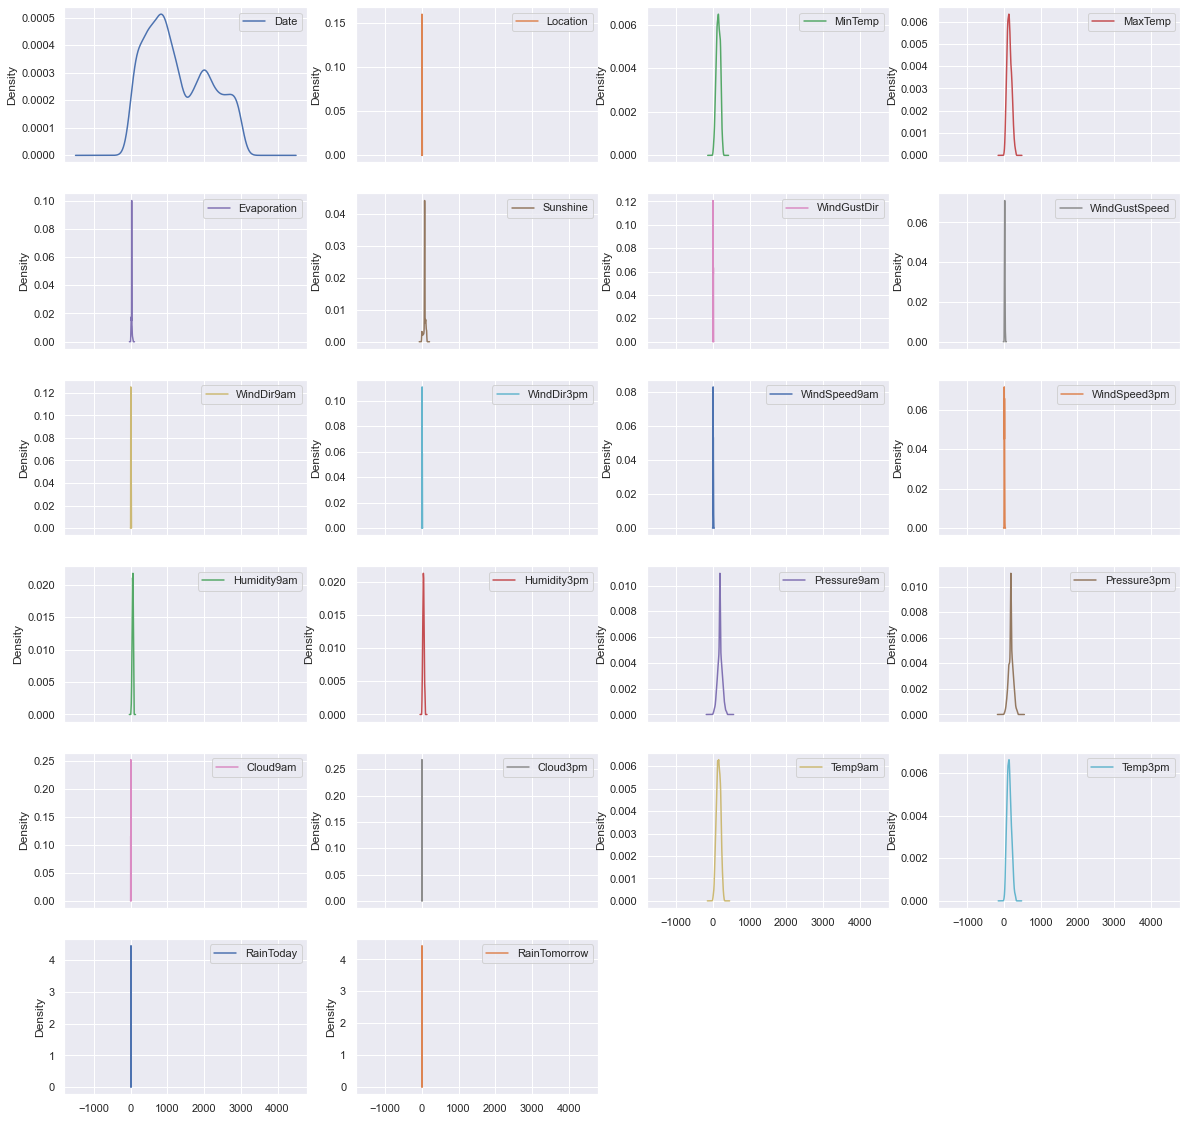

In [143]:
#check skewness using density plot
x.plot(kind='density',subplots=True,layout=(6,4),figsize=(20,20));

In [144]:
#checking skewness
x.skew().sort_values(ascending=False)

RainToday        1.302136
RainTomorrow     1.291967
WindSpeed9am     0.659841
Evaporation      0.502978
WindGustSpeed    0.491024
Date             0.400017
Temp3pm          0.342058
MaxTemp          0.325875
WindSpeed3pm     0.289687
WindDir9am       0.165621
Humidity3pm      0.117177
WindGustDir      0.109778
Pressure3pm      0.053477
Pressure9am      0.032808
Temp9am         -0.030221
Location        -0.038161
MinTemp         -0.075855
WindDir3pm      -0.127045
Humidity9am     -0.222803
Cloud3pm        -0.239722
Cloud9am        -0.305069
Sunshine        -0.724878
dtype: float64

# Removing skewness

In [145]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

In [146]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer(method='box-cox')
pipe=Pipeline(steps=[('s',scaler),('p',power)])

In [147]:
data=pipe.fit_transform(x)

In [148]:
#make dataframe
x=pd.DataFrame(data,columns=x.columns)

# VIF(Variance Inflation Factor)

In [149]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(0,x.shape[1])]
    return vif

In [150]:
vif()

,Variables,VIF Factor
0,Date,1.415944
1,Location,1.500076
2,MinTemp,8.584194
3,MaxTemp,26.845733
4,Evaporation,1.580609
5,Sunshine,2.073151
6,WindGustDir,1.622749
7,WindGustSpeed,2.355350
8,WindDir9am,1.339588
9,WindDir3pm,1.491042


In [151]:
#Cloud9am and Cloud3pm are Same VIF Factor
x.drop('Cloud9am',axis=1,inplace=True)
#WindSpeed3pm and WindSpeed9am as same VIF Factor
x.drop('WindSpeed9am',axis=1,inplace=True)
#WindDir9am and WindDir3pm are same VIF Factor
x.drop('WindDir3pm',axis=1,inplace=True)
#Location and Date variables as same VIF Factor
x.drop('Location',axis=1,inplace=True)
#Evaporation and WindGustDir are Same vif Factor
x.drop('Evaporation',axis=1,inplace=True)

# Standard Scale

In [152]:
x=scale.fit_transform(x)

# Model Selection

In [153]:
#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error

In [154]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()
lasso=Lasso()
ridge=Ridge()

In [155]:
list_models=[lr,dtr,knr,svr,rfr,gbr,abr,lasso,ridge]

# LinearRegression

In [156]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.5053857145001441 Random Number: 25


In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=25)
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
pred=lr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.5053857145001441
mean_absolute_error: 1.6969280213509772
mean_squared_error: 12.334179021805863
r2_score: -0.10873233220637935


# DecisionTreeRegressor

In [158]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtr.fit(x_train,y_train)
    score=dtr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 1.0 Random Number: 1


In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)
dtr.fit(x_train,y_train)
print(dtr.score(x_train,y_train))
pred=dtr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

1.0
mean_absolute_error: 1.2466423506047344
mean_squared_error: 14.166089489177589
mean_squared_log_error: 0.2127523516014885
r2_score: 0.3417836859241449


# KNeighborsRegressor

In [160]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    knr.fit(x_train,y_train)
    score=knr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.6778386738947306 Random Number: 74


In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
knr.fit(x_train,y_train)
print(knr.score(x_train,y_train))
pred=knr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.6778386738947306
mean_absolute_error: 1.4977566603813093
mean_squared_error: 13.493596969969982
mean_squared_log_error: 0.2071435218943434
r2_score: 0.04446729780829339


# Support Vector Regressor

In [162]:
maxscore=0
maxrn=0
for i in [22,33,44,55]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svr.fit(x_train,y_train)
    score=svr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.47129696345153327 Random Number: 22


In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=22)
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred=svr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.47129696345153327
mean_absolute_error: 1.3518855573397404
mean_squared_error: 13.210502477875522
r2_score: -1.2382689452529694


# RandomForestRegressor

In [164]:
maxscore=0
maxrn=0
for i in [11,22,33,44,55]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfr.fit(x_train,y_train)
    score=rfr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.9484002819220282 Random Number: 55


In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=33)
rfr.fit(x_train,y_train)
print(rfr.score(x_train,y_train))
pred=rfr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.948006765919309
mean_absolute_error: 1.2021483415980432
mean_squared_error: 9.033374227603527
mean_squared_log_error: 0.14530560203162401
r2_score: 0.41199555151140854


# GradientBoostingRegressor

In [166]:
maxscore=0
maxrn=0
for i in [10,20,30,40]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gbr.fit(x_train,y_train)
    score=gbr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.6618588182346202 Random Number: 10


In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
pred=gbr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.6618588182346201
mean_absolute_error: 1.426759458313259
mean_squared_error: 10.927027272394474
r2_score: 0.10245319781310946


# AdaBoostRegressor

In [168]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    abr.fit(x_train,y_train)
    score=abr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.47058581032441094 Random Number: 14


In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=65)
abr.fit(x_train,y_train)
print(abr.score(x_train,y_train))
pred=abr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.42509546804641596
mean_absolute_error: 1.6361115321301292
mean_squared_error: 13.239018782626621
mean_squared_log_error: 0.23779895988516692
r2_score: 0.34718765450061373


# Lasso Regressor

In [170]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lasso.fit(x_train,y_train)
    score=lasso.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.24585729629581 Random Number: 39


In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=39)
lasso.fit(x_train,y_train)
print(lasso.score(x_train,y_train))
pred=lasso.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.24585729629581
mean_absolute_error: 2.134040688082266
mean_squared_error: 14.436913416613432
mean_squared_log_error: 0.7010067385198281
r2_score: -13.437102919541413


# Ridge Regressor

In [172]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    ridge.fit(x_train,y_train)
    score=ridge.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.5052951739219662 Random Number: 25


In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=25)
ridge.fit(x_train,y_train)
print(ridge.score(x_train,y_train))
pred=ridge.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.5052951739219662
mean_absolute_error: 1.6885095612962706
mean_squared_error: 12.32874919767993
r2_score: -0.11333496821229727


# Cross Validation

In [174]:
for model in list_models:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())

LinearRegression()
[0.51084589 0.45957554 0.46755804 0.4350843  0.53338386]
0.4812895259227705
DecisionTreeRegressor()
[0.0268779  0.34475993 0.35087423 0.31423393 0.1083411 ]
0.22901741968350384
KNeighborsRegressor()
[0.37292918 0.46165314 0.49754472 0.3903654  0.41421841]
0.42734216816266557
SVR()
[0.459093   0.43927831 0.41987557 0.3962401  0.46488579]
0.4358745527630499
RandomForestRegressor()
[0.48331446 0.56335192 0.68115016 0.56879921 0.57446971]
0.5742170902437704
GradientBoostingRegressor()
[0.48458618 0.51431512 0.56168465 0.48521014 0.54348874]
0.5178569643781025
AdaBoostRegressor()
[0.36512866 0.31618363 0.36422163 0.28918716 0.51829965]
0.3706041454947654
Lasso()
[0.23585267 0.21893534 0.19540318 0.21719565 0.22699846]
0.2188770605585245
Ridge()
[0.51068975 0.46143446 0.46697452 0.43646609 0.53277022]
0.4816670108000908


# RandomForestRegressor is best Model

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=52)
rfr.fit(x_train,y_train)
print(rfr.score(x_train,y_train))
pred=rfr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.9491888379781878
mean_absolute_error: 1.1519600933479999
mean_squared_error: 8.32832687600565
mean_squared_log_error: 0.1373756654136335
r2_score: 0.40355958067140585


In [176]:
random_forest_params={'max_features': ['auto', 'sqrt', 'log2']}

In [177]:
rfr_grid = GridSearchCV(rfr, random_forest_params, cv=5)
rfr_grid.fit(x_train,y_train)
print('Best score:', rfr_grid.best_score_)
print('Best score:', rfr_grid.best_params_)
print('Best score:', rfr_grid.best_estimator_)

Best score: 0.5940000065569309
Best score: {'max_features': 'sqrt'}
Best score: RandomForestRegressor(max_features='sqrt')


# Save the Model

In [178]:
#save the model
joblib.dump(rfr,'rainfall_prediction_rfr.obj')

['rainfall_prediction_rfr.obj']

In [179]:
#load the model
loaded_model=joblib.load('rainfall_prediction_rfr.obj')

In [180]:
#check the model is working or not
loaded_model.predict(x_test)

array([ 0.2143548 , 12.032     ,  0.1171774 , ..., 12.858     ,
        0.42229566,  0.023     ])